In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
X_feature_names = ['age', 'gender', 'body mass index', 'average blood pressure','bl_0','bl_1','bl_2','bl_3','bl_4','bl_5']
#bin target variable for better sampling
bins = 50*np.arange(8)
binned_y = np.digitize(y, bins)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=binned_y)

In [8]:
from sklearn.ensemble import RandomForestRegressor
rft = RandomForestRegressor()
rft.fit(X_train, y_train)

RandomForestRegressor()

In [9]:
y_pred = rft.predict(X_test)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

46.1814606741573

In [10]:
(np.abs(y_test - y_pred)/(y_test)).mean()

0.3804602375233983

In [11]:
rft.estimators_

[DecisionTreeRegressor(max_features='auto', random_state=474910424),
 DecisionTreeRegressor(max_features='auto', random_state=338379039),
 DecisionTreeRegressor(max_features='auto', random_state=445657292),
 DecisionTreeRegressor(max_features='auto', random_state=2125877997),
 DecisionTreeRegressor(max_features='auto', random_state=5407011),
 DecisionTreeRegressor(max_features='auto', random_state=1320809317),
 DecisionTreeRegressor(max_features='auto', random_state=1131668232),
 DecisionTreeRegressor(max_features='auto', random_state=767820379),
 DecisionTreeRegressor(max_features='auto', random_state=29588007),
 DecisionTreeRegressor(max_features='auto', random_state=1720507580),
 DecisionTreeRegressor(max_features='auto', random_state=205856554),
 DecisionTreeRegressor(max_features='auto', random_state=1077037503),
 DecisionTreeRegressor(max_features='auto', random_state=586561726),
 DecisionTreeRegressor(max_features='auto', random_state=724840326),
 DecisionTreeRegressor(max_featu

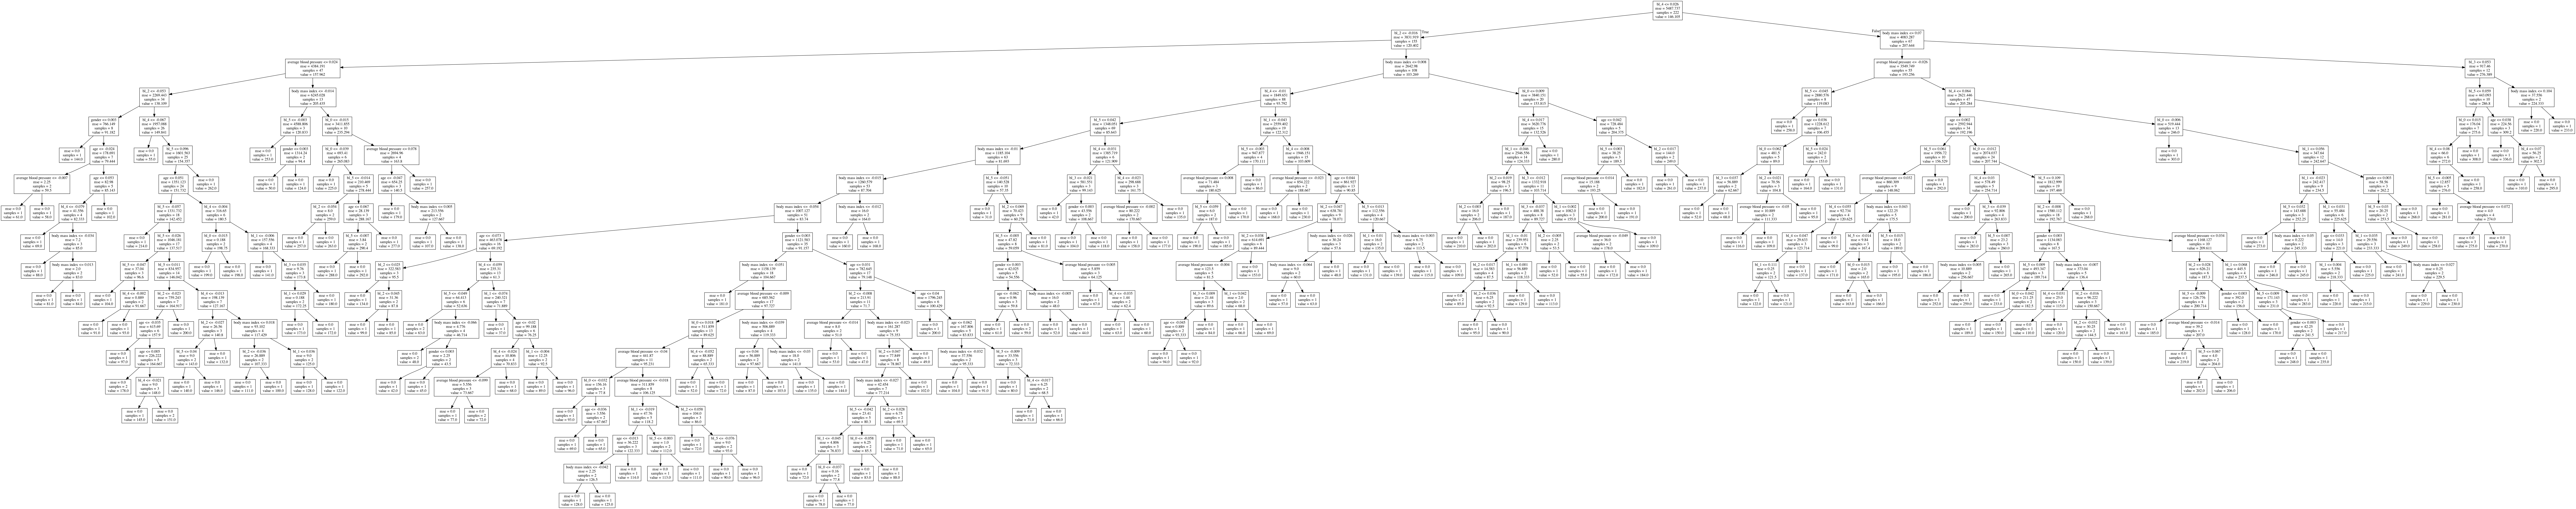

In [12]:
import numpy as np
from sklearn import tree
from six import StringIO
import pydot
from IPython.display import Image
dot_diabetes = StringIO()
tree.export_graphviz(rft.estimators_[0], out_file = dot_diabetes,
feature_names = X_feature_names)
graph, = pydot.graph_from_dot_data(dot_diabetes.getvalue())
Image(graph.create_png())


In [13]:
rft.feature_importances_

array([0.06454471, 0.00964461, 0.23352478, 0.08271644, 0.050832  ,
       0.0594643 , 0.05339542, 0.02060797, 0.35168647, 0.07358329])

[Text(0, 0, 'age'),
 Text(1, 0, 'gender'),
 Text(2, 0, 'body mass index'),
 Text(3, 0, 'average blood pressure'),
 Text(4, 0, 'bl_0'),
 Text(5, 0, 'bl_1'),
 Text(6, 0, 'bl_2'),
 Text(7, 0, 'bl_3'),
 Text(8, 0, 'bl_4'),
 Text(9, 0, 'bl_5')]

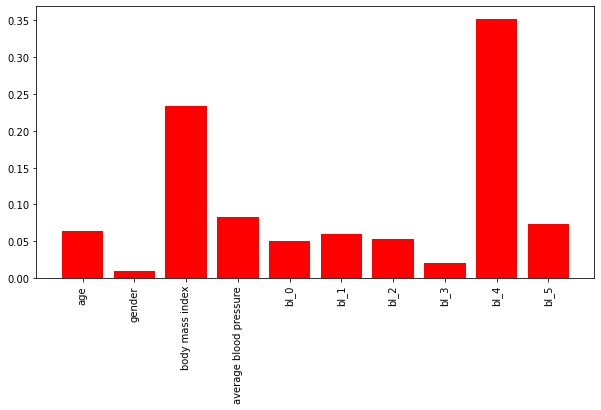

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
bar_rects = ax.bar(np.arange(10),
rft.feature_importances_,color='r',align='center')
ax.xaxis.set_ticks(np.arange(10))
ax.set_xticklabels(X_feature_names, rotation='vertical')